# # # # # # # # # # # # # # # # # # # # # #

# DATA LOAD AND CLEANING

# # # # # # # # # # # # # # # # # # # # # #

# Load the Academy Awards Nominees csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn.naive_bayes import GaussianNB
import os
from pathlib import Path

def get_data_file_path(filename):
    current_dir = Path.cwd()  
    data_dir = current_dir / 'data' 
    file_path = data_dir / filename
    return file_path

def read_csv_file(filename, sep=",", dtype=''):
    file_path = get_data_file_path(filename)
    if dtype == '':
        file = pd.read_csv(file_path, sep=sep)
    else:
        file = pd.read_csv(file_path, sep=sep, dtype=dtype)
    return file

df = read_csv_file('the_oscar_award.csv', ',')
df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


# Remove the honorary categories

In [2]:
honorary_awards = ['HONORARY AWARD',
 'HONORARY FOREIGN LANGUAGE FILM AWARD',
 'IRVING G. THALBERG MEMORIAL AWARD',
 'JEAN HERSHOLT HUMANITARIAN AWARD']
df = df[~df.category.isin(honorary_awards)]

# Mongodb connection + insertion of the data

In [3]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017")
if "TFG" in client.list_database_names():
    client.drop_database("TFG")
    print("Database TFG dropped.")
db = client["TFG"]
academy_awards_nominees = db["academy_awards_nominees"]
academy_awards_nominees.insert_many(df.to_dict("records"))

Database TFG dropped.


# Standarization: Actor in a Leading Role

In [4]:
actors = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['ACTOR', 
                                                                                    'ACTOR IN A LEADING ROLE']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': actors}}, {'$set': {'category': 'Actor in a Leading Role'}})

# Standarization: Actress in a Leading Role

In [5]:
actresses = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['ACTRESS', 
                                                                                       'ACTRESS IN A LEADING ROLE']}}, {}))]
academy_awards_nominees.update_many({"_id": {'$in': actresses}}, {'$set': {'category': 'Actress in a Leading Role'}})

# Standarization: Actor in a Supporting Role

In [6]:
sup_Actors = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['ACTOR IN A SUPPORTING ROLE']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': sup_Actors}}, {'$set': {'category': 'Actor in a Supporting Role'}})

# Standarization: Actress in a Supporting Role

In [7]:
sup_Actresses = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['ACTRESS IN A SUPPORTING ROLE']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': sup_Actresses}}, {'$set': {'category': 'Actress in a Supporting Role'}})

# Standarization: Animated Feature Film

In [8]:
animated = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['ANIMATED FEATURE FILM']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': animated}}, {'$set': {'category': 'Animated Feature Film'}})

# Standarization: Best Picture

In [9]:
picture = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['OUTSTANDING PICTURE', 
                                                                                     'OUTSTANDING PRODUCTION', 
                                                                                     'OUTSTANDING MOTION PICTURE', 
                                                                                     'BEST MOTION PICTURE', 
                                                                                     'BEST PICTURE']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': picture}}, {'$set': {'category': 'Best Picture'}})

# Standarization: Production Design

In [10]:
production = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['ART DIRECTION', 
                                                                                        'PRODUCTION DESIGN']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': production}}, {'$set': {'category': 'Production Design'}})

# Standarization: Documentary

In [11]:
documentary = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['DOCUMENTARY', 
                                                                                                     'DOCUMENTARY (Feature)',
                                                                                                     'DOCUMENTARY FEATURE FILM']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': documentary}}, {'$set': {'category': 'Documentary Feature Film'}})

# Standarization: Documentary Short

In [12]:
doc_short = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['DOCUMENTARY (Short Subject)',
                                                                                                   'DOCUMENTARY SHORT FILM']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': doc_short}}, {'$set': {'category': 'Documentary Short Film'}})

# Standarization: Makeup and Hairstyling

In [13]:
makeup = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['MAKEUP', 
                                                                                    'MAKEUP AND HAIRSTYLING']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': makeup}}, {'$set': {'category': 'Makeup and Hairstyling'}})

# Standarization: Visual Effects

In [14]:
visual = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['ENGINEERING EFFECTS', 
                                                                            'SPECIAL EFFECTS', 
                                                                            'SPECIAL VISUAL EFFECTS', 
                                                                            'SPECIAL ACHIEVEMENT AWARD (Visual Effects)', 
                                                                            'VISUAL EFFECTS']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': visual}}, {'$set': {'category': 'Visual Effects'}})

# Standarization: Film Editing

In [15]:
editing = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': 'FILM EDITING'}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': editing}}, {'$set': {'category': 'Film Editing'}})

# Standarization: International Feature Film

In [16]:
inter = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['HONORARY FOREIGN LANGUAGE FILM AWARD', 
                                                                                   'SPECIAL FOREIGN LANGUAGE FILM AWARD', 
                                                                                   'FOREIGN LANGUAGE FILM', 
                                                                                   'INTERNATIONAL FEATURE FILM']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': inter}}, {'$set': {'category': 'International Feature Film'}})

# Standarization: Costume Design 40th edition - 95th edition

In [17]:
costume = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': 'COSTUME DESIGN'}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': costume}}, {'$set': {'category': 'Costume Design'}})

# Standarization: Cinematography 40th edition - 95th edition

In [18]:
cinematography = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': 'CINEMATOGRAPHY'}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': cinematography}}, {'$set': {'category': 'Cinematography'}})

# Standarization: Original Song

In [19]:
song = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['MUSIC (Original Song)', 
                                                                      'MUSIC (Song)', 
                                                                      'MUSIC (Song--Original for the Picture)']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': song}}, {'$set': {'category': 'Music (Original Song)'}})

# Standarization: Animated Short Film

In [20]:
animated_short = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['SHORT SUBJECT (Cartoon)', 
                                                                                        'SHORT SUBJECT (Animated)', 
                                                                                        'SHORT FILM (Animated)']}}, {}))]
academy_awards_nominees.update_many({'_id':{'$in': animated_short}}, {'$set': {'category': 'Short Film (Animated)'}})

# Standarization: Short Film

In [21]:
short = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['SHORT SUBJECT (Live Action)', 
                                                                                   'SHORT FILM (Dramatic Live Action)', 
                                                                                   'SHORT FILM (Live Action)']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': short}}, {'$set': {'category': 'Short Film (Live Action)'}})

# Standarization: Director

In [22]:
director = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['DIRECTING']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': director}}, {'$set': {'category': 'Directing'}})

# Standarization: Sound

In [23]:
sound = [nominee['_id'] for nominee in list(academy_awards_nominees.find({'category': {'$in': ['SOUND RECORDING', 
                                                                                   'SOUND MIXING', 
                                                                                   'SOUND']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': sound}}, {'$set': {'category': 'Sound'}})

# Standarization: Original Non-musical Score

In [24]:
non_mus_score = [nominee['_id'] for nominee in list(academy_awards_nominees.find({
                                       'category': {'$in': ['MUSIC (Music Score of a Dramatic Picture)',
                                                            'MUSIC (Music Score of a Dramatic or Comedy Picture)',
                                                            'MUSIC (Music Score--substantially original)',
                                                            'MUSIC (Original Music Score)',
                                                            'MUSIC (Original Score--for a motion picture [not a musical])',
                                                            'MUSIC (Original Score)',
                                                            'MUSIC (Original Dramatic Score)', 'MUSIC (Scoring)']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': non_mus_score}}, {'$set': {'category': 'Music (Original Score)'}})

# Standarization: Original Screenplay

In [25]:
og_scrnplay = [nominee['_id'] for nominee in list(academy_awards_nominees.find({
                       'category': {'$in': ['WRITING (Original Screenplay)',
                                            'WRITING (Screenplay Written Directly for the Screen)',
                                            'WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced)',
                                            'WRITING (Screenplay--Original)',
                                            'WRITING (Story and Screenplay)',
                                            'WRITING (Story and Screenplay--based on factual material or material not previously published or produced)',
                                            'WRITING (Story and Screenplay--based on material not previously published or produced)',
                                            'WRITING (Story and Screenplay--written directly for the screen)']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': og_scrnplay}}, {'$set': {'category': 'Writing (Original Screenplay)'}})

# Standarization: Adapted Screenplay

In [26]:
ad_screenplay = [nominee['_id'] for nominee in list(academy_awards_nominees.find({
                           'category': {'$in': ['WRITING',
                                                'WRITING (Screenplay)',
                                                'WRITING (Adaptation)',
                                                'WRITING (Adapted Screenplay)',
                                                'WRITING (Screenplay Adapted from Other Material)',
                                                'WRITING (Screenplay Based on Material Previously Produced or Published)',
                                                'WRITING (Screenplay Based on Material from Another Medium)',
                                                'WRITING (Screenplay--Adapted)',
                                                'WRITING (Screenplay--based on material from another medium)']}}, {}))]
academy_awards_nominees.update_many({'_id': {'$in': ad_screenplay}}, {'$set': {'category': 'Writing (Adapted Screenplay)'}})

# Remove categories that aren't in the 95th Academy Awards

In [27]:
categories = [
    "Actor in a Leading Role",
    "Actor in a Supporting Role",
    "Actress in a Leading Role",
    "Actress in a Supporting Role",
    "Animated Feature Film",
    "Best Picture",
    "Cinematography",
    "Costume Design",
    "Directing",
    "Documentary Feature Film",
    "Documentary Short Film",
    "Film Editing",
    "International Feature Film",
    "Makeup and Hairstyling",
    "Music (Original Score)",
    "Music (Original Song)",
    "Production Design",
    "Short Film (Animated)",
    "Short Film (Live Action)",
    "Sound",
    "Visual Effects",
    "Writing (Adapted Screenplay)",
    "Writing (Original Screenplay)",
]

In [28]:
print("Total of entries:", academy_awards_nominees.count_documents({}))
print("Total of entries with non valid categories:", academy_awards_nominees.count_documents({'category': {'$nin': categories}}))

Total of entries: 10542
Total of entries with non valid categories: 1536


In [29]:
academy_awards_nominees.delete_many({'category': {'$nin': categories}})

In [30]:
print("Total of entries:", academy_awards_nominees.count_documents({}))
print("Total of entries with non valid categories:", academy_awards_nominees.count_documents({'category': {'$nin': categories}}))

Total of entries: 9006
Total of entries with non valid categories: 0


# Special Case: E.T. The Extra-Terrestrial

In [31]:
academy_awards_nominees.update_many({'film': 'E.T. The Extra-Terrestrial'}, {'$set': {'film': 'E.T. the Extra-Terrestrial'}})

# Special Case: Les Misérables (international film from 2019)

In [32]:
academy_awards_nominees.update_many({'film': 'Les Misérables', 'year_ceremony': 2020}, {'$set': {'film': 'Les Misérables (2019)'}})

# Special Case: Alejandro G. Iñárritu

In [33]:
academy_awards_nominees.update_many({'name': 'Alejandro González Iñárritu'}, {'$set': {'name': 'Alejandro G. Iñárritu'}})

# Special Case: Bosnia and Herzegovina

In [34]:
academy_awards_nominees.update_many({'name': 'Bosnia & Herzegovina'}, {'$set': {'name': 'Bosnia and Herzegovina'}})

# Save directors names in 'name' column for category International Feature Film

In [35]:
academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                     'category': 'International Feature Film'},
                                    {'$rename': {'name': 'country'}})  

In [36]:
int_direc_df = read_csv_file('international_directors.csv', sep=',')

In [37]:
for idx, row in int_direc_df.iterrows():
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                         'film': row['film'], 
                                         'category': 'International Feature Film'},
                                        {'$set': {'name': row['person']}})

# Save continent of the film

In [38]:
country_continent_df = read_csv_file('country_continent_df.csv', sep=',')
continent_map = {}
for idx, row in country_continent_df.iterrows():
    if row['country'] not in continent_map:
        continent_map[row['country']] = row['continent']

In [39]:
for film in academy_awards_nominees.find({'year_ceremony': {'$gte': 2002},
                                         'category': 'International Feature Film'}):
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002},
                                         'film': film['film'],
                                         'category': 'International Feature Film'},
                                        {'$set': {'continent': continent_map[film['country']]}})

# Correct 'name' column for categories Writing (Adapted Screenplay) and Writing (Original Screenplay)

In [40]:
for category in ['Writing (Adapted Screenplay)', 'Writing (Original Screenplay)']:
    for p in academy_awards_nominees.find({'category': category, 'year_ceremony': {'$gte': 2002}}).distinct('name'):
        el = p
        el = el.replace(' &', ',')
        el = el.replace('; Story by ', ', ')
        el = el.replace(' and ', ', ')
        el = el.replace('; Screen story by ', ', ')
        el = el.replace('; Original Story by ', ', ')
        el = el.replace('; Original story by ', ', ')
        el = el.replace('; Dialogue by ', ', ')
        try:
            el = el.split('- ')[1]
        except:
            pass
        try:
            el = el.split('by ', 1)[1]
        except:
            pass
        try:
            el = el.split(', ')
            el.sort()
            el = ', '.join(list(set(el)))
        except:
            pass
        
        academy_awards_nominees.update_many({'name': p, 
                                             'category': category, 
                                             'year_ceremony': {'$gte': 2002}}, 
                                            {'$set': {'name': el}})

# Correct 'name' column for categories Directing, Animated Feature Film, Makeup and Hairstyling, Costume Design, International Feature Film and Music (Original Score)

In [41]:
for category in ['Directing', 'Animated Feature Film',
                 'Makeup and Hairstyling', 'Costume Design',
                 'International Feature Film', 'Music (Original Score)',
                 'Writing (Original Screenplay)', 'Writing (Adapted Screenplay)']:
    for p in academy_awards_nominees.find({'category': category, 'year_ceremony': {'$gte': 2002}}).distinct('name'):
        el = p.replace(' and ', ', ')
        el = el.split(', ')
        el.sort()
        el = ', '.join(el)
        academy_awards_nominees.update_many({'name': p, 
                                             'category': category, 
                                             'year_ceremony': {'$gte': 2002}}, 
                                            {'$set': {'name': el}})

# Correct 'name' column for category Music (Original Song)

In [42]:
for p in academy_awards_nominees.find({'category': 'Music (Original Song)', 'year_ceremony': {'$gte': 2002}}).distinct('name'):
    el = p.replace('Music and Lyric by ', '')
    el = el.replace('Music by ', '')
    el = el.replace('; Lyric by ', ', ')
    el = el.replace(' and ', ', ')
    el = el.split(', ')
    el = list(set(el))
    el.sort()
    el = ', '.join(el)
    academy_awards_nominees.update_many({'name': p, 
                                         'category': 'Music (Original Song)', 
                                         'year_ceremony': {'$gte': 2002}}, 
                                         {'$set': {'name': el}})

In [43]:
counter = 0
print("95th ACADEMY AWARD NOMINATIONS")
print("==============================\n")
for el in categories:
    a = list(client['TFG']['academy_awards_nominees'].find({'category': el, 'ceremony': 95}))
    print("{}:".format(el))
    for i in range(len(a)):
        print("    {}".format(a[i]['film']))
        counter += 1
    print("\n\n")
print("Counter:", counter)

95th ACADEMY AWARD NOMINATIONS

Actor in a Leading Role:
    Elvis
    The Banshees of Inisherin
    The Whale
    Aftersun
    Living



Actor in a Supporting Role:
    The Banshees of Inisherin
    Causeway
    The Fabelmans
    The Banshees of Inisherin
    Everything Everywhere All at Once



Actress in a Leading Role:
    Tár
    Blonde
    To Leslie
    The Fabelmans
    Everything Everywhere All at Once



Actress in a Supporting Role:
    Black Panther: Wakanda Forever
    The Whale
    The Banshees of Inisherin
    Everything Everywhere All at Once
    Everything Everywhere All at Once



Animated Feature Film:
    Guillermo del Toro's Pinocchio
    Marcel the Shell with Shoes On
    Puss in Boots: The Last Wish
    The Sea Beast
    Turning Red



Best Picture:
    All Quiet on the Western Front
    Avatar: The Way of Water
    The Banshees of Inisherin
    Elvis
    Everything Everywhere All at Once
    The Fabelmans
    Tár
    Top Gun: Maverick
    Triangle of Sadness
    

# Load Cinemagoer package from imdb

In [44]:
# pip install git+https://github.com/cinemagoer/cinemagoer

In [45]:
from imdb import Cinemagoer
ia = Cinemagoer()

# Get IMDB's ID of person or movie

In [46]:
def get_ID(subject, name, confl, ID_map):    
    if subject == "person":
        person_ID = ia.search_person(name)[0].personID
        if 'awards' not in ia.get_person_awards(person_ID)['data']:
            return -1, confl, ID_map
        else:
            return person_ID, confl, ID_map
                
    elif subject == "movie":
        l = ia.search_movie(name)
        if len(l) == 0:
            confl.append(name)
            return -1, confl, ID_map
        year = int(list(client['TFG']['academy_awards_nominees'].find({'film': name}))[-1]['year_film'])
        ID = 0
        keep = True
        while keep:
            film = ia.get_movie(l[ID].movieID)
            if 'year' not in film:
                ID += 1
            elif ID < len(l) and film['year'] not in [year, year-1, year+1]:
                ID += 1
            else:
                keep = False
            if ID == len(l):
                confl.append(name)
                return -1, confl, ID_map
            
        movie_ID = l[ID].movieID
        if 'awards' not in ia.get_movie_awards(movie_ID)['data']:
            confl.append(name)
            return -1, confl, ID_map

        ID_map[name] = movie_ID
            
        return ID_map[name], confl, ID_map

# Get list of awards of a person or movie

In [47]:
def get_awards(subject, name, confl, ID_map): 
    if name in ID_map:
        ID = ID_map[name]
    elif name in confl:
        return -1, confl, ID_map
    else:
        ID, confl, ID_map = get_ID(subject, name, confl, ID_map)
        
    if ID == -1:
        return -1, confl, ID_map
    
    if subject == "person":
        try:
            return ia.get_person_awards(ID)['data']['awards'], confl, ID_map
        except:
            return -1, confl, ID_map
    
    elif subject == "movie":
        return ia.get_movie_awards(ID)['data']['awards'], confl, ID_map

# Map name of awards in IMDB

In [48]:
def map_award(award):
    award_mapping = {'Oscar': 'Academy Awards, USA',
                     'Golden Globe': 'Golden Globes, USA',
                     'Bafta': 'BAFTA Awards'}
    return award_mapping[award]

# Map person's category in IMDB

In [49]:
def map_category(category):
    category_mapping = {'Writing (Adapted Screenplay)': 'Best Writing, Adapted Screenplay'}
    return category_mapping['category']

# Get number of wins, nominations and missing values of a person or movie (Oscar, Golden Globe or Bafta)

### (if no award is passed everything will be returned)

In [50]:
def check_awards_outcome(subject, name, category=None, award=None, confl=[], ID_map={}):
    awards, confl, ID_map = get_awards(subject, name, confl, ID_map)
    if awards == -1:
        return -1, confl, ID_map
    else:
        if subject == 'movie':
            if award == None:
                awards_dict = {'Academy Awards, USA': {'wins': 0, 'noms': 0, 'missing': 0},
                               'Golden Globes, USA': {'wins': 0, 'noms': 0, 'missing': 0},
                               'BAFTA Awards': {'wins': 0, 'noms': 0, 'missing': 0}}
            else:
                award = map_award(award)
                awards_dict = {award: {'wins': 0, 'noms': 0, 'missing': 0}}
                
            for el in awards:
                if el['category'] in awards_dict:
                    if 'result' in el:
                        if el['result'] == 'Winner':
                            awards_dict[el['category']]['wins'] += 1
                        else:
                            awards_dict[el['category']]['noms'] += 1
                    else:
                        awards_dict[el['category']]['missing'] += 1
            return awards_dict, confl, ID_map

        elif subject == 'person':
            #category = map_category(category)
            if award == None:
                awards_dict = {'Academy Awards, USA': {'wins': 0, 'noms': 0, 'missing': 0, 'missing_list': []},
                              'Golden Globes, USA': {'wins': 0, 'noms': 0, 'missing': 0, 'missing_list': []},
                              'BAFTA Awards': {'wins': 0, 'noms': 0, 'missing': 0, 'missing_list': []}}
            else:
                award = map_award(award)
                awards_dict = {award: {'wins': 0, 'noms': 0, 'missing': 0, 'missing_list': []}}
                
            for el in awards:
                if el['award'] in awards_dict:
                    if 'result' in el:
                        if el['result'] == 'Winner':
                            awards_dict[el['award']]['wins'] += 1
                        else:
                            awards_dict[el['award']]['noms'] += 1
                    else:
                        awards_dict[el['award']]['missing'] += 1
                        awards_dict[el['award']]['missing_list'].append({'movie': el['movies']['title'], 'category': el['category']})
                        
                        
            
            if subject == 'person':
                k = [[], [], []]
                cat_trans = {'Best Achievement in Directing': 'Directing',
                             'Best Director': 'Directing'}
                for el in awards:
                    if 'movies' in el and el['movies']['year'] < 2022:
                        if el['award'] == award:
                            if 'result' in el:
                                if el['result'] == 'Winner':
                                    if 'movies' in el:
                                        wins += 1
                                        k[0].append(el['movies']['title'])
                                    else:
                                        k[2].append(el)
                                else:
                                    noms += 1
                                    k[1].append(el['movies']['title'])
                            else:
                                film = list(academy_awards_nominees.find({'film': el['movies']['title'], 
                                                                          'category': cat_trans[el['category']],
                                                                          'name': name}, 
                                                                         {'_id': 0, 'winner': 1}))[-1]['winner']
                                if film == True:
                                    if 'movies' in el:
                                        wins += 1
                                        k[0].append(el['movies']['title'])
                                    else:
                                        k[2].append(el)
                                elif film == False:
                                    if 'movies' in el:
                                        noms += 1
                                        k[1].append(el['movies']['title'])
                                    else:
                                        k[2].append(el)
                                else:
                                    missing['films'].append(el)

            return awards_dict, confl, ID_map

# List of nominees from 2002 until 2023

In [51]:
films2002 = list(set([film['film'] for film in list(academy_awards_nominees.find({'year_ceremony': {'$gte': 2002}, 'category': {"$in": [
    'Actor in a Leading Role',
    'Actor in a Supporting Role',
    'Actress in a Leading Role',
    'Actress in a Supporting Role',
    'Animated Feature Film',
    'Best Picture',
    'Cinematography',
    'Costume Design',
    'Directing',
    'Documentary Feature Film',
    'Documentary Short Film',
    'Film Editing',
    'International Feature Film',
    'Makeup and Hairstyling',
    'Music (Original Score)',
    'Music (Original Song)',
    'Production Design',
    'Short Film (Animated)',
    'Short Film (Live Action)',
    'Sound',
    'Visual Effects',
    'Writing (Adapted Screenplay)',
    'Writing (Original Screenplay)'
]}}, {'_id': 0, 'film': 1}))]))

# Set ID mapping dictionary

In [52]:
try:
    ID_map = read_csv_file('ID_map_df.csv', 
                         sep = ',',
                         dtype = {'title': str, 'ID': str})
    ID_map = {el['title']: el['ID'] for el in ID_map.to_dict('records')}
except:
    confl = []
    ID_map = {}

# Example of use of check_awards_outcome() function for Avatar (Oscar, Golden Globe and Bafta)

### the library is currently unavailable

In [53]:
# outcome, _, _ = check_awards_outcome("movie", "Avatar", "Oscar", ID_map=ID_map)
# print("Oscars:", outcome['Academy Awards, USA']['wins'], 
#                  outcome['Academy Awards, USA']['noms'], 
#                  outcome['Academy Awards, USA']['missing'])
# 
# outcome, _, _ = check_awards_outcome("movie", "Avatar", "Golden Globe", ID_map=ID_map)
# print("Golden Globes:", outcome['Golden Globes, USA']['wins'], 
#                         outcome['Golden Globes, USA']['noms'], 
#                         outcome['Golden Globes, USA']['missing'])
# 
# outcome, _, _ = check_awards_outcome("movie", "Avatar", "Bafta", ID_map=ID_map)
# print("Baftas:", outcome['BAFTA Awards']['wins'], 
#                  outcome['BAFTA Awards']['noms'], 
#                  outcome['BAFTA Awards']['missing'])

# Example of use of check_awards_outcome() function for Steven Spielberg (Oscar, Golden Globe and Bafta)

### the library is currently unavailable

In [54]:
# outcome, _, _= check_awards_outcome("person", "Steven Spielberg", "Oscar")
# print("Oscars:", outcome['Academy Awards, USA']['wins'], 
#                  outcome['Academy Awards, USA']['noms'], 
#                  outcome['Academy Awards, USA']['missing'])
# for out in outcome['Academy Awards, USA']['missing_list']:
#     print(out)
#     
# outcome, _, _ = check_awards_outcome("person", "Steven Spielberg", "Golden Globe")
# print("Golden Globes:", outcome['Golden Globes, USA']['wins'], 
#                         outcome['Golden Globes, USA']['noms'], 
#                         outcome['Golden Globes, USA']['missing'])
# for out in outcome['Golden Globes, USA']['missing_list']:
#     print(out)
#     
# outcome, _, _ = check_awards_outcome("person", "Steven Spielberg", "Bafta")
# print("Baftas:", outcome['BAFTA Awards']['wins'], 
#                  outcome['BAFTA Awards']['noms'], 
#                  outcome['BAFTA Awards']['missing'])
# for out in outcome['BAFTA Awards']['missing_list']:
#     print(out)

# Add number of wins and nominations of films from 2002 until 2022 (Oscar, Golden Globe and Bafta) to the database

In [55]:
awards_list_df = read_csv_file('awards.csv', sep=',')

In [56]:
for i in range(len(films2002)):
    awards_list = [ast.literal_eval(award) for award in awards_list_df[films2002[i]]]
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 'film': films2002[i]},
                                        {'$set': {'film_awards.winsOscars': awards_list[0]['wins'],
                                                  'film_awards.nomsOscars': awards_list[0]['noms'],
                                                  'film_awards.winsGoldenGlobes': awards_list[1]['wins'],
                                                  'film_awards.nomsGoldenGlobes': awards_list[1]['noms'],
                                                  'film_awards.winsBaftas': awards_list[2]['wins'],
                                                  'film_awards.nomsBaftas': awards_list[2]['noms']}})

# Add ratings

In [57]:
ratings_df = read_csv_file('ratings.csv', sep=',')
for index, row in ratings_df.iterrows():    
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002},
                                         'category': 'Best Picture',
                                         'film': row['film']},
                                        {'$set': {'rating': row['rating']}})

# Load race and gender csv and save them in DB for some categories

In [58]:
race_gender_df = read_csv_file('race_gender_df.csv', sep=',')

In [59]:
for index, row in race_gender_df.iterrows():    
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002},
                                         'category': {'$in': ['Actor in a Leading Role',
                                                              'Actor in a Supporting Role',
                                                              'Actress in a Leading Role',
                                                              'Actress in a Supporting Role',
                                                              'Directing',
                                                              'Animated Feature Film',
                                                              'Makeup and Hairstyling',
                                                              'Costume Design',
                                                              'International Feature Film',
                                                              'Music (Original Score)',
                                                              'Music (Original Song)',
                                                              'Writing (Original Screenplay)',
                                                              'Writing (Adapted Screenplay)']}, 
                                         'name': row['person']},
                                        {'$set': {'gender': row['gender'],
                                                  'race': row['race']}})

# Flag films with same nomination in Golden Globes

In [60]:
golden_globes = read_csv_file('golden_globe_awards.csv', sep=',')

In [61]:
golden_globes_categories = {'Best Motion Picture - Drama': 'Best Picture',
                           'Best Motion Picture - Musical or Comedy': 'Best Picture',
                           'Best Performance by an Actress in a Motion Picture - Drama': 'Actress in a Leading Role',
                           'Best Performance by an Actor in a Motion Picture - Drama': 'Actor in a Leading Role',
                           'Best Performance by an Actress in a Motion Picture - Musical or Comedy': 'Actress in a Leading Role',
                           'Best Performance by an Actor in a Motion Picture - Musical or Comedy': 'Actor in a Leading Role',
                           'Best Performance by an Actress in a Supporting Role in any Motion Picture': 'Actress in a Supporting Role',
                           'Best Performance by an Actor in a Supporting Role in any Motion Picture': 'Actor in a Supporting Role',
                           'Best Director - Motion Picture': 'Directing',
                           'Best Screenplay - Motion Picture': ['Writing (Adapted Screenplay)', 
                                                                'Writing (Original Screenplay)'],
                           'Best Motion Picture - Foreign Language': 'International Feature Film',
                           'Best Original Score - Motion Picture': 'Music (Original Score)',
                           'Best Original Song - Motion Picture': 'Music (Original Song)',
                           'Best Motion Picture - Animated': 'Animated Feature Film'}

In [62]:
for idx, row in golden_globes.iterrows():
    if row['category'] == 'Best Screenplay - Motion Picture':
        academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': {'$in': golden_globes_categories['Best Screenplay - Motion Picture']},
                                             'film': row['film']},
                                            {'$set': {'nom_GG_same_cat': 1}})

    elif row['film'] is np.nan or row['category'] == 'Best Motion Picture - Foreign Language':
        academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': golden_globes_categories[row['category']],
                                             'film': row['name']},
                                            {'$set': {'nom_GG_same_cat': 1}})
    else:
        academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': golden_globes_categories[row['category']],
                                             'film': row['film']},
                                            {'$set': {'nom_GG_same_cat': 1}})
        
        
        
for idx, row in golden_globes[golden_globes['win'] == True].iterrows():
    if row['category'] == 'Best Screenplay - Motion Picture':
        academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': {'$in': golden_globes_categories['Best Screenplay - Motion Picture']},
                                             'film': row['film']},
                                            {'$set': {'win_GG_same_cat': 1}})

    elif row['film'] is np.nan or row['category'] == 'Best Motion Picture - Foreign Language':
        academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': golden_globes_categories[row['category']],
                                             'film': row['name']},
                                            {'$set': {'win_GG_same_cat': 1}})
    else:
        academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': golden_globes_categories[row['category']],
                                             'film': row['film']},
                                            {'$set': {'win_GG_same_cat': 1}})

In [63]:
# THIS IS WHAT WAS DONE TO CLEAN THE DATASET FOR THE GOLDEN GLOBES


# map_names = {'Good Night, and Good Luck': 'Good Night, and Good Luck.',
#              'Birdman': 'Birdman or (The Unexpected Virtue of Ignorance)',
#              'Eternal Sunshine of The Spotless Mind': 'Eternal Sunshine of the Spotless Mind',
#              'Midnight In Paris': 'Midnight in Paris',
#              'Once Upon a Time...in Hollywood': 'Once upon a Time...in Hollywood',
#              'Notes On a Scandal': 'Notes on a Scandal',
#              'Up In The Air': 'Up in the Air',
#              'Precious: Based On The Novel Push By Sapphire': "Precious: Based on the Novel 'Push' by Sapphire",
#              'Call Me By Your Name': 'Call Me by Your Name',
#              'Three Billboards Outside Ebbing, Missouri': 'Three Billboards outside Ebbing, Missouri',
#              'Star Is Born, A (2018)': 'A Star Is Born',
#              'Zero Dark Thirty \t': 'Zero Dark Thirty',
#              'Moulin Rouge!': 'Moulin Rouge',
#              'The Chorus': 'The Chorus (Les Choristes)',
#              'Joyeux Noel (Merry Christmas)': 'Joyeux Noël',
#              'A Prophet (Un Prophete)': 'A Prophet',
#              'The White Ribbon (Das Weisse Band - Eine Deutsche Kindergeschichte)': 'The White Ribbon',
#              'In A Better World': 'In a Better World',
#              'Kon Tiki': 'Kon-Tiki',
#              'Nowhere In Africa': 'Nowhere in Africa',
#              'The Crime of Padre Amaro': 'El Crimen del Padre Amaro',
#              'The Lives Of Others': 'The Lives of Others',
#              'Wall-E': 'WALL-E',
#              'The Princess And The Frog': 'The Princess and the Frog',
#              'How To Train Your Dragon': 'How to Train Your Dragon',
#              'Puss In Boots': 'Puss in Boots',
#              'Alejandro González Iñárritu': 'Alejandro G. Iñárritu',
#              'Joel Coen Ethan Coen': 'Ethan Coen, Joel Coen',
#              'A. R. Rahman': 'A.R. Rahman',
#              'Trent Reznor, Atticus Ross': 'Atticus Ross, Trent Reznor',
#              'Ludwig Göransson': 'Ludwig Goransson'}
# 
# for idx, row in golden_globes.iterrows():
#     if row['film'] != 'I, Tonya' and row['name'] not in ['I, Tonya', 
#                                                             'Ethan Coen, Joel Coen', 
#                                                             'Atticus Ross, Trent Reznor']:
#         for cat in ['film', 'name']:
#             if type(row[cat]) != float and len(row[cat].split(', ')) == 2 and row[cat] not in list(map_names.values()):
#                 golden_globes.loc[idx, cat] = ' '.join(row[cat].split(', ')[::-1])
# 
# golden_globes.loc[(golden_globes['category'] == 'Best Performance by an Actress in a Motion Picture - Drama') & 
#                   (golden_globes['name'] == 'The Deep End'), 'name'] = 'Tilda Swinton'
# golden_globes.loc[(golden_globes['category'] == 'Best Performance by an Actress in a Motion Picture - Drama') & 
#                   (golden_globes['name'] == 'Tilda Swinton') &
#                   (golden_globes['year_ceremony'] == 2002), 'film'] = 'The Deep End'
# 
# golden_globes['name'] = golden_globes['name'].str.strip()
# 
# golden_globes['film'].replace(map_names, inplace=True)
# golden_globes['name'].replace(map_names, inplace=True)
# 
# golden_globes = golden_globes[golden_globes['category'].isin(golden_globes_categories.keys())]

# Flag films with same nomination in Baftas and Visual Effects Society awards for Visual Effects and Baftas for Film Editing

In [64]:
baftas = read_csv_file('bafta_awards.csv', sep=',')
vis_effects_df = read_csv_file('vis_effects_awards.csv', sep=',')

for idx, row in baftas[baftas['category'].isin(['Visual Effects', 'Film Editing'])].iterrows():
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': row['category'],
                                             'film': row['film']},
                                            {'$set': {'nom_BAF_same_cat': 1}}) 
for idx, row in vis_effects_df.iterrows():
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': 'Visual Effects',
                                             'film': row['film']},
                                            {'$set': {'nom_VES_same_cat': 1}})  
        
        
for idx, row in baftas.loc[(baftas['winner'] == True) & (baftas['category'].isin(['Visual Effects', 
                                                                                  'Film Editing']))].iterrows():
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': row['category'],
                                             'film': row['film']},
                                            {'$set': {'win_BAF_same_cat': 1}})
for idx, row in vis_effects_df[vis_effects_df['winner'] == True].iterrows():
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                             'category': 'Visual Effects',
                                             'film': row['film']},
                                            {'$set': {'win_VES_same_cat': 1}})


# Flag actors and actresses with same nomination in SAG awards

In [65]:
sag_awards = read_csv_file('sag_awards.csv', sep=',')

for idx, row in sag_awards.iterrows():
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                         'category': row['category'],
                                         'film': row['film'],
                                         'name': row['name']},
                                        {'$set': {'nom_SAG_same_cat': 1}})

        
for idx, row in sag_awards[sag_awards['winner'] == True].iterrows():
    academy_awards_nominees.update_many({'year_ceremony': {'$gte': 2002}, 
                                         'category': row['category'],
                                         'film': row['film'],
                                         'name': row['name']},
                                        {'$set': {'win_SAG_same_cat': 1}})

# # # # # # # # # # # # # # # # # # # # # #

# EXPLORATION OF THE DATA

# # # # # # # # # # # # # # # # # # # # # #

# Representation of Races and Gender in Nominations and Wins among categories

In [66]:
df = pd.DataFrame(academy_awards_nominees.find({'category': {'$in': ['Actor in a Leading Role', 
                                                                     'Actress in a Leading Role',
                                                                     'Actor in a Supporting Role', 
                                                                     'Actress in a Supporting Role',
                                                                     'Directing',
                                                                     'Animated Feature Film',
                                                                     'Makeup and Hairstyling',
                                                                     'Costume Design',
                                                                     'International Feature Film', 
                                                                     'Music (Original Score)',
                                                                     'Music (Original Song)',
                                                                     'Writing (Original Screenplay)',
                                                                     'Writing (Adapted Screenplay)']},
                                                 'year_ceremony': {'$gte': 2002, '$lte': 2022}}))

In [67]:
df = pd.concat([df.drop(['film_awards'], axis=1), df['film_awards'].apply(pd.Series)], axis=1)

# Demography of winners and nominees

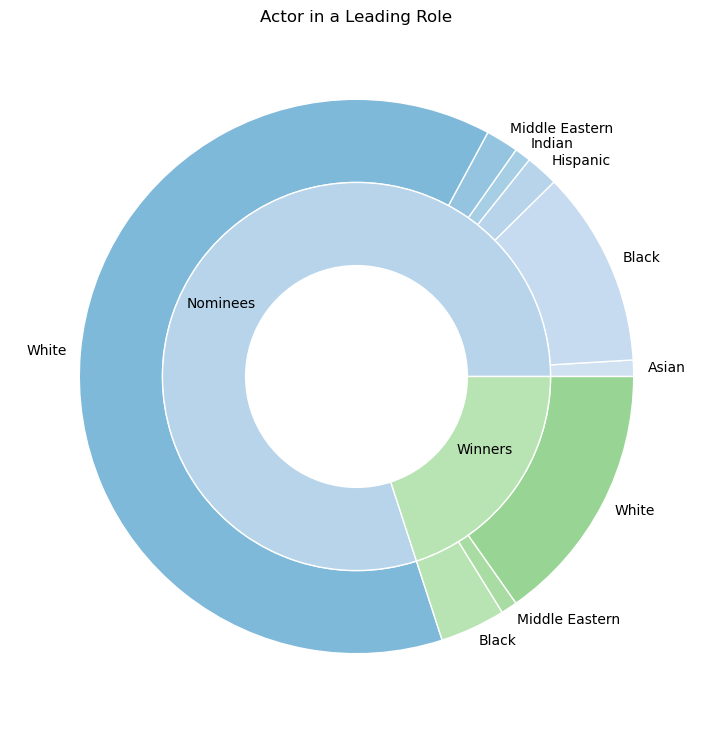

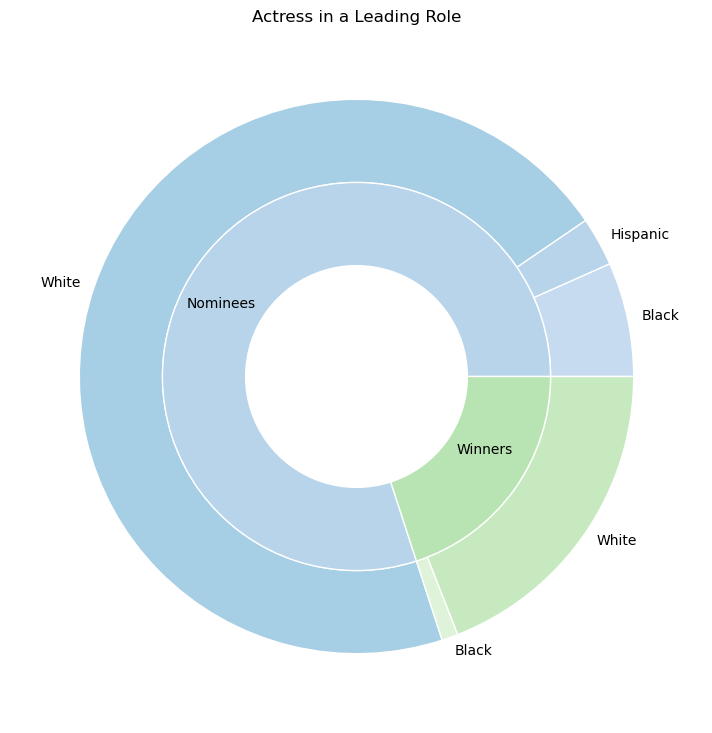

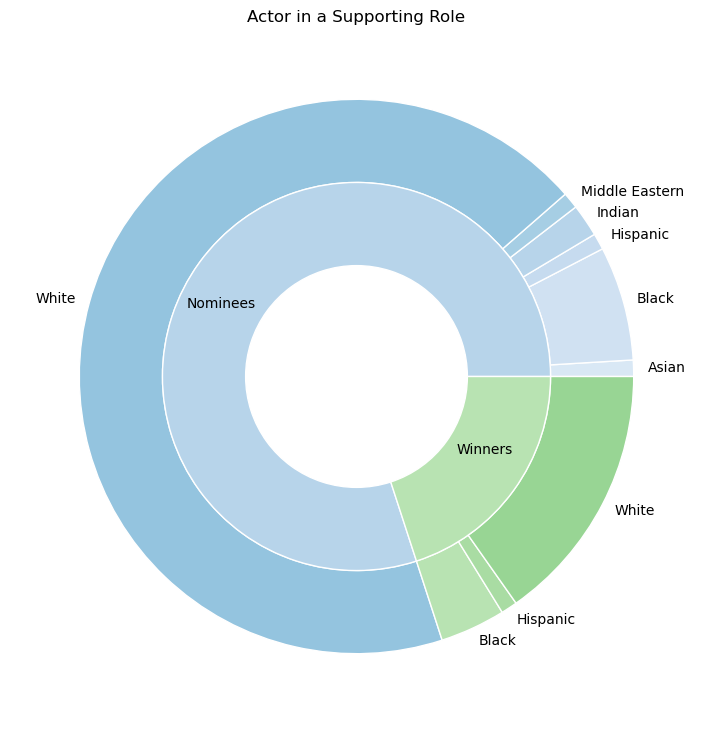

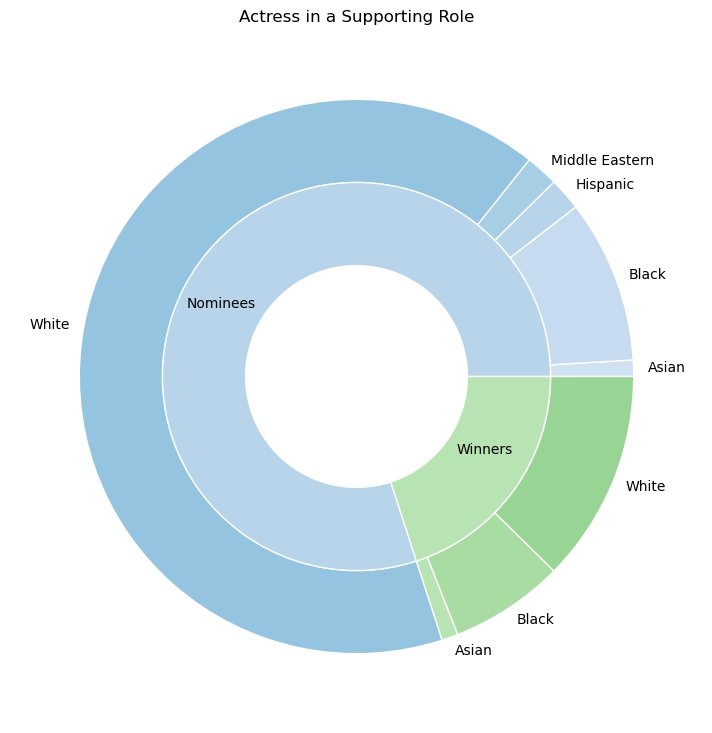

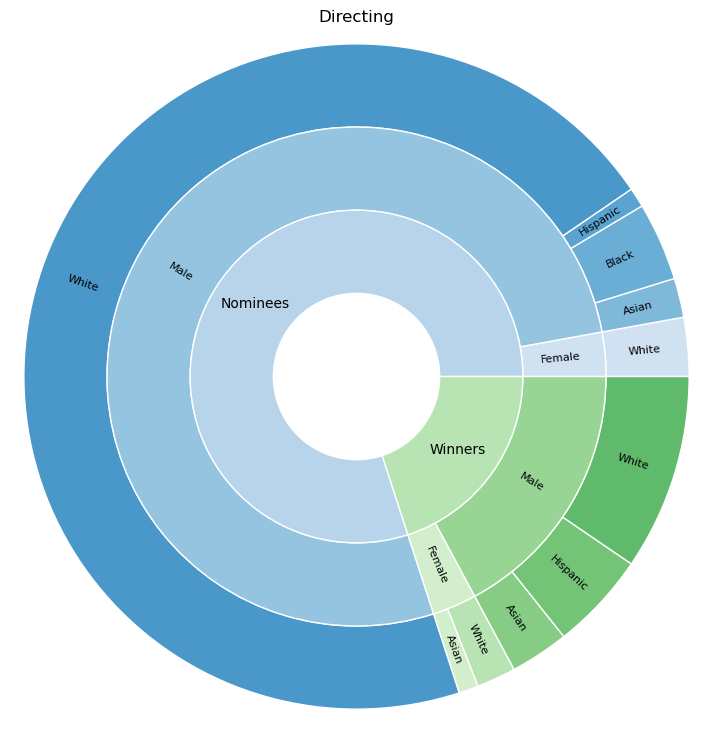

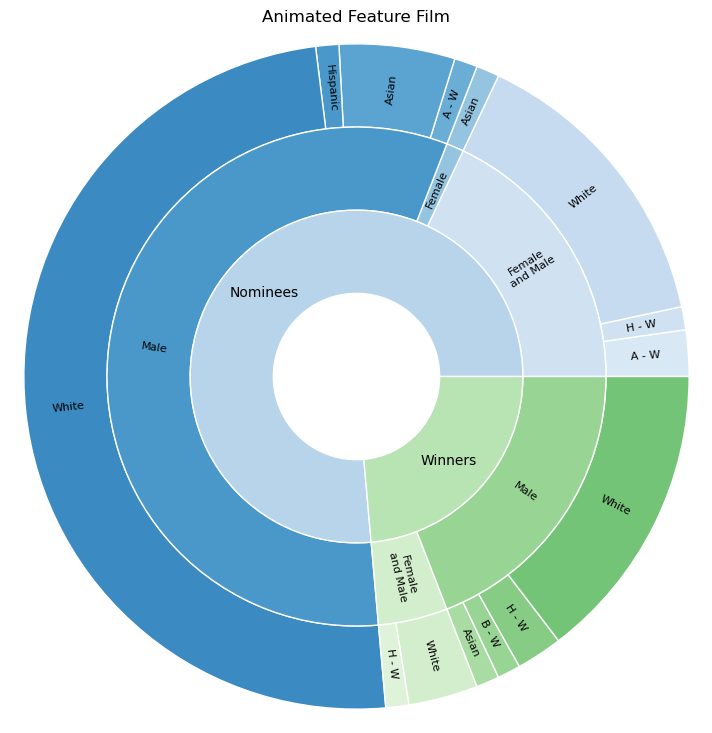

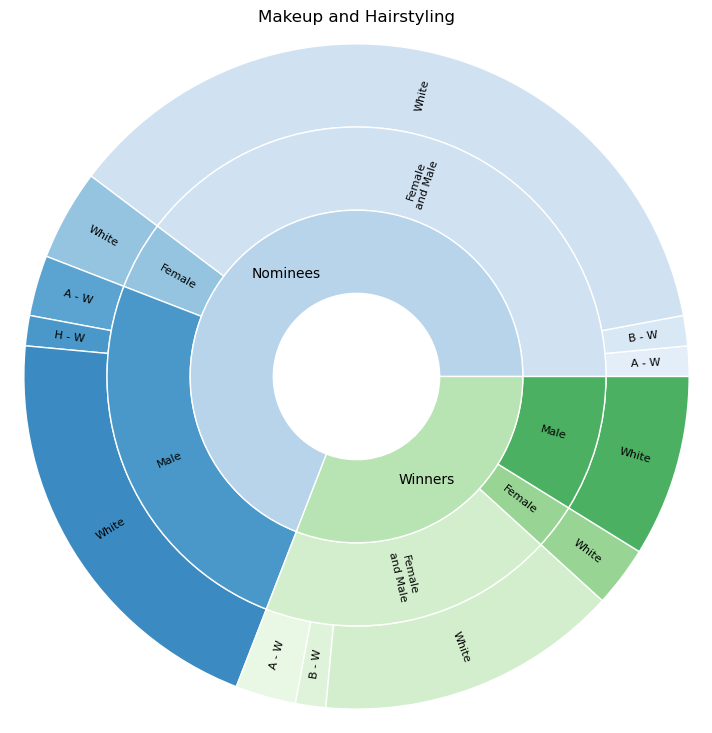

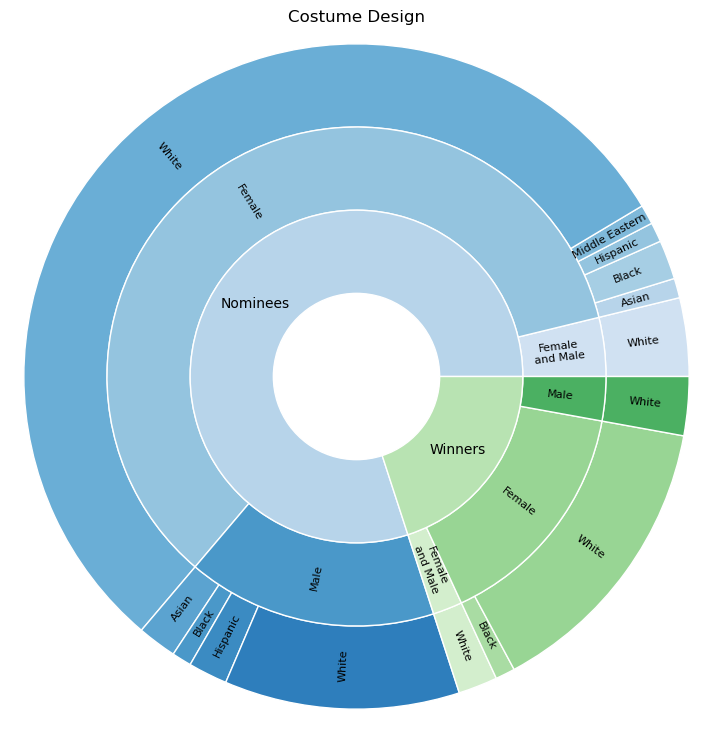

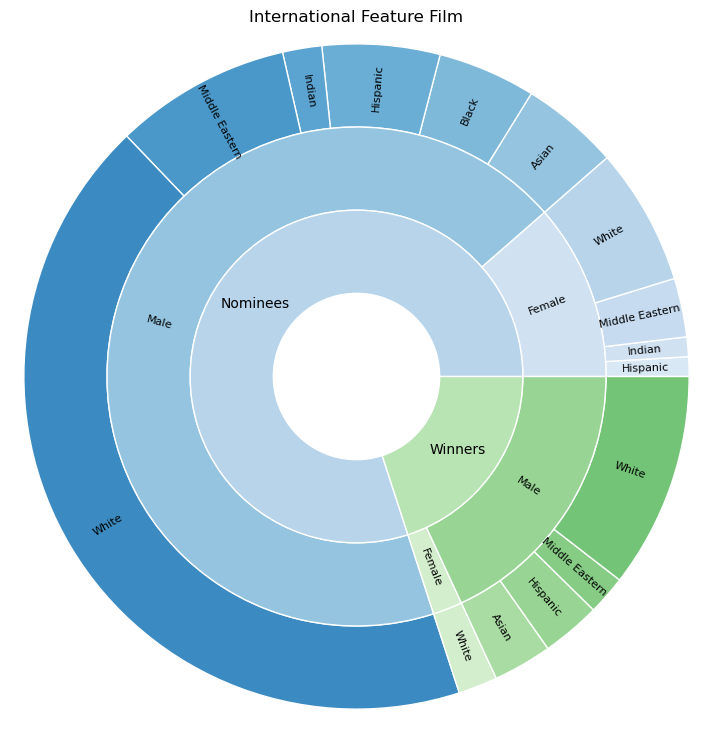

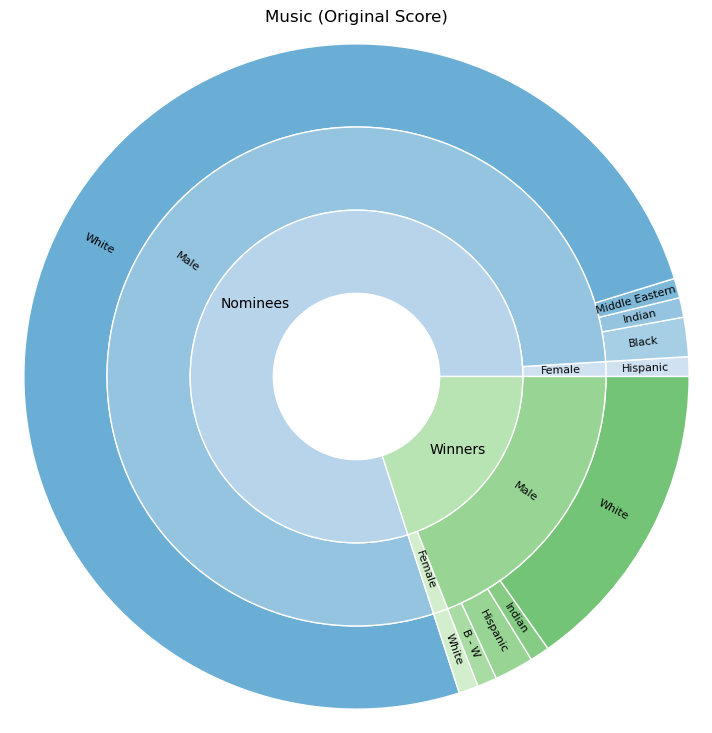

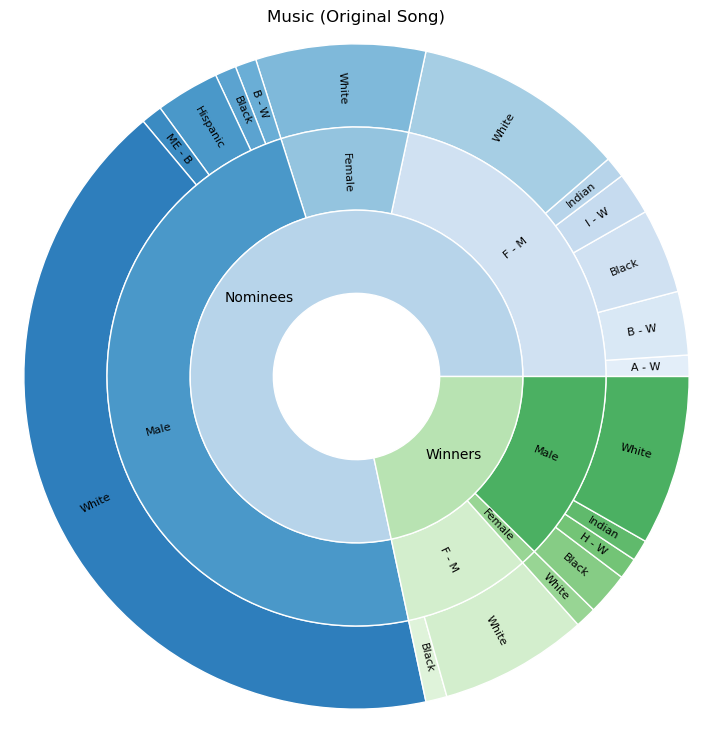

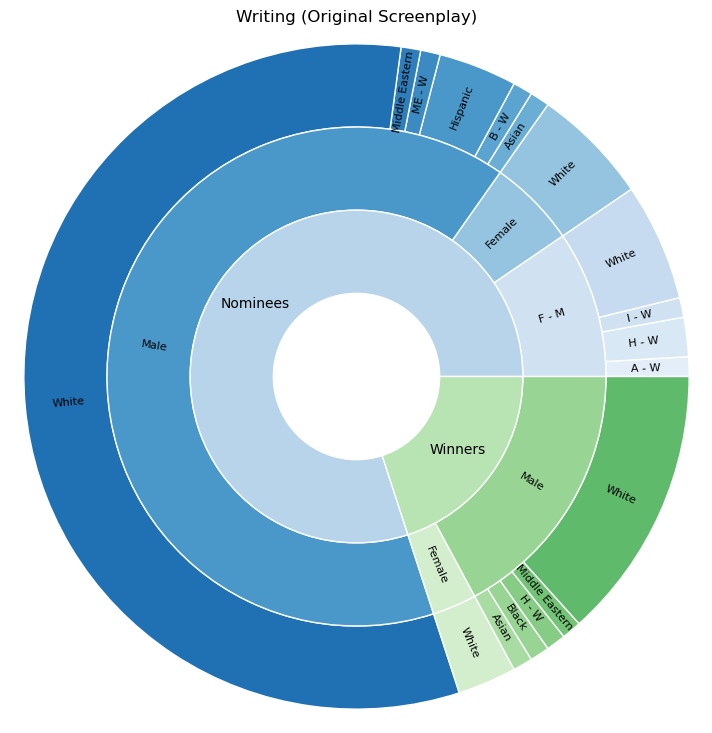

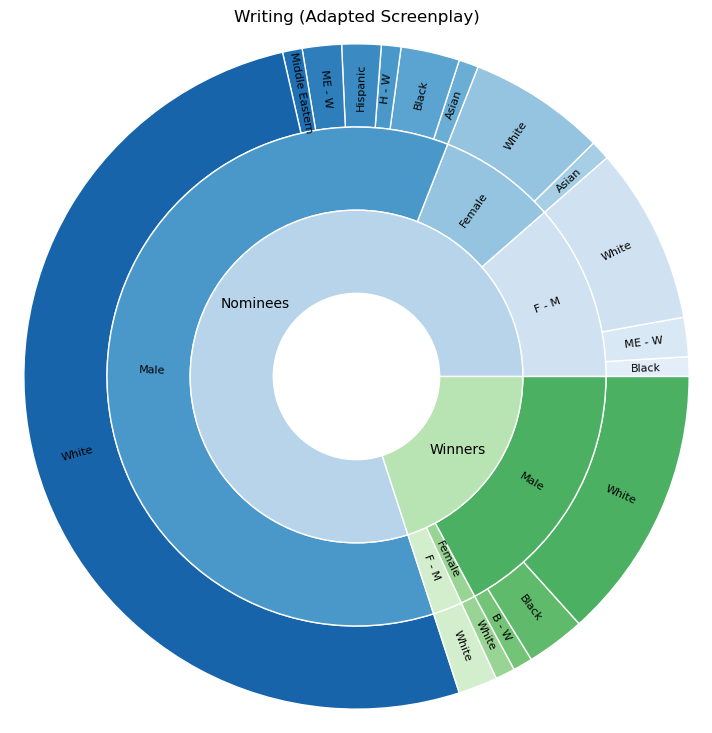

In [68]:
a,b = [plt.cm.Blues, plt.cm.Greens]
cols = {'Actor in a Leading Role': [a(.2), a(.25), a(.3), a(.35), a(.4), a(.45), b(.3), b(.35), b(.4)],
        'Actress in a Leading Role': [a(.25), a(.3), a(.35), b(.15), b(.25)],
        'Actor in a Supporting Role': [a(.15), a(.2), a(.25), a(.3), a(.35), a(.4), b(.3), b(.35), b(.4)],
        'Actress in a Supporting Role': [a(.2), a(.25), a(.3), a(.35), a(.4), b(.3), b(.35), b(.4), b(.45)],
        'Directing': {'0': [plt.cm.Blues(.2), plt.cm.Blues(.45), plt.cm.Blues(.5), plt.cm.Blues(.55), plt.cm.Blues(.6),
                            plt.cm.Greens(.2), plt.cm.Greens(.3), plt.cm.Greens(.45), plt.cm.Greens(.5), plt.cm.Greens(.55)],
                      '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), plt.cm.Greens(.2), plt.cm.Greens(.4)]},
        'Animated Feature Film': {'0': [plt.cm.Blues(.15), plt.cm.Blues(.2), plt.cm.Blues(.25), plt.cm.Blues(.4), 
                                        plt.cm.Blues(.5), plt.cm.Blues(.55), plt.cm.Blues(0.6), plt.cm.Blues(0.65), 
                                        plt.cm.Greens(.15), plt.cm.Greens(.2), plt.cm.Greens(.35), 
                                        plt.cm.Greens(.4), plt.cm.Greens(.45), plt.cm.Greens(.5)],
                                  '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), plt.cm.Blues(.6), 
                                        plt.cm.Greens(.2), plt.cm.Greens(.4)]},
        'Makeup and Hairstyling': {'0': [plt.cm.Blues(.1), plt.cm.Blues(.15), plt.cm.Blues(.2), plt.cm.Blues(.4), 
                                         plt.cm.Blues(.55), plt.cm.Blues(0.6), plt.cm.Blues(0.65), plt.cm.Greens(.1), 
                                         plt.cm.Greens(.15), plt.cm.Greens(.2), plt.cm.Greens(.4), plt.cm.Greens(.6)],
                                   '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), plt.cm.Blues(.6), 
                                         plt.cm.Greens(.2), plt.cm.Greens(.4), plt.cm.Greens(.6)]},
        'Costume Design': {'0': [plt.cm.Blues(.2), plt.cm.Blues(.3), plt.cm.Blues(.35), plt.cm.Blues(.4), 
                                 plt.cm.Blues(.45), plt.cm.Blues(.5), plt.cm.Blues(.55), plt.cm.Blues(.6),
                                 plt.cm.Blues(.65), plt.cm.Blues(.7), plt.cm.Greens(.2), plt.cm.Greens(.35), 
                                 plt.cm.Greens(.4), plt.cm.Greens(.6)],
                           '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), plt.cm.Blues(.6), 
                                         plt.cm.Greens(.2), plt.cm.Greens(.4), plt.cm.Greens(.6)]},
        'International Feature Film': {'0': [plt.cm.Blues(.15), plt.cm.Blues(.2), plt.cm.Blues(.25), plt.cm.Blues(.3), 
                                             plt.cm.Blues(.4), plt.cm.Blues(.45), plt.cm.Blues(.5), plt.cm.Blues(.55),
                                             plt.cm.Blues(.6), plt.cm.Blues(.65), plt.cm.Greens(.2), plt.cm.Greens(.35), 
                                             plt.cm.Greens(.4), plt.cm.Greens(.45), plt.cm.Greens(.5)],
                                       '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), 
                                             plt.cm.Greens(.2), plt.cm.Greens(.4)]},
       'Music (Original Score)': {'0': [plt.cm.Blues(.2), plt.cm.Blues(.35), plt.cm.Blues(.4), plt.cm.Blues(.45), 
                                        plt.cm.Blues(.5), plt.cm.Greens(.2), plt.cm.Greens(.35), 
                                        plt.cm.Greens(.4), plt.cm.Greens(.45), plt.cm.Greens(.5)],
                                  '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), 
                                        plt.cm.Greens(.2), plt.cm.Greens(.4)]},
       'Music (Original Song)': {'0': [plt.cm.Blues(.1), plt.cm.Blues(.15), plt.cm.Blues(.2), plt.cm.Blues(.25), 
                                       plt.cm.Blues(.3), plt.cm.Blues(.35), plt.cm.Blues(.45), plt.cm.Blues(.5),
                                       plt.cm.Blues(.55), plt.cm.Blues(.6), plt.cm.Blues(.65), plt.cm.Blues(.7),
                                       plt.cm.Greens(.15), plt.cm.Greens(.2), plt.cm.Greens(.4), plt.cm.Greens(.45), 
                                       plt.cm.Greens(.5), plt.cm.Greens(.55), plt.cm.Greens(.6)],
                                  '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), plt.cm.Blues(.6), 
                                        plt.cm.Greens(.2), plt.cm.Greens(.4), plt.cm.Greens(.6)]},
       'Writing (Original Screenplay)': {'0': [plt.cm.Blues(.1), plt.cm.Blues(.15), plt.cm.Blues(.2), plt.cm.Blues(.25), 
                                               plt.cm.Blues(.4), plt.cm.Blues(.5), plt.cm.Blues(.55), plt.cm.Blues(.6),
                                               plt.cm.Blues(.65), plt.cm.Blues(.7), plt.cm.Blues(.75), plt.cm.Greens(.2), 
                                               plt.cm.Greens(.35), plt.cm.Greens(.4), plt.cm.Greens(.45), plt.cm.Greens(.5),
                                               plt.cm.Greens(.55)],
                                         '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), plt.cm.Blues(.6), 
                                               plt.cm.Greens(.2), plt.cm.Greens(.4)]},
       'Writing (Adapted Screenplay)': {'0': [plt.cm.Blues(.1), plt.cm.Blues(.15), plt.cm.Blues(.2), plt.cm.Blues(.35), 
                                               plt.cm.Blues(.4), plt.cm.Blues(.5), plt.cm.Blues(.55), plt.cm.Blues(.6),
                                               plt.cm.Blues(.65), plt.cm.Blues(.7), plt.cm.Blues(.75), plt.cm.Blues(.8), 
                                               plt.cm.Greens(.2), plt.cm.Greens(.4), plt.cm.Greens(.5), plt.cm.Greens(.55), 
                                               plt.cm.Greens(.6)],
                                         '1': [plt.cm.Blues(.2), plt.cm.Blues(.4), plt.cm.Blues(.6), 
                                               plt.cm.Greens(.2), plt.cm.Greens(.4), plt.cm.Greens(.6)]}}
    
labs = {'Directing': ['Female', 'Male', 'Female', 'Male'], 
        'Animated Feature Film': ['Female\nand Male', 'Female', 'Male', 'Female\nand Male', 'Male'], 
        'Makeup and Hairstyling': ['Female\nand Male', 'Female', 'Male', 'Female\nand Male', 'Female', 'Male'],
        'Costume Design': ['Female\nand Male', 'Female', 'Male', 'Female\nand Male', 'Female', 'Male'],
        'International Feature Film': ['Female', 'Male', 'Female', 'Male'],
        'Music (Original Score)': ['Female', 'Male', 'Female', 'Male'],
        'Music (Original Song)': ['F - M', 'Female', 'Male', 'F - M', 'Female', 'Male'],
        'Writing (Original Screenplay)': ['F - M', 'Female', 'Male', 'Female', 'Male'],
        'Writing (Adapted Screenplay)': ['F - M', 'Female', 'Male', 'F - M', 'Female', 'Male']}

for category in ['Actor in a Leading Role', 'Actress in a Leading Role', 
                 'Actor in a Supporting Role', 'Actress in a Supporting Role']:
    df2 = df[df['category'] == category]
    df2 = df2.groupby(['race', 'winner']).size().to_frame('count').reset_index()
    df2 = df2.pivot_table('count', ['winner', 'race'])
    group_sum = df2.groupby('winner')['count'].sum()
    vals = df2['count']
    fig, ax = plt.subplots(figsize=(15,9))
    ax.pie(vals, 
           radius=1,
           labels=[el[1] for el in df2.index],
           labeldistance=1.05,
           colors = cols[category],
           wedgeprops=dict(width=0.3, edgecolor='w'))

    ax.pie(group_sum,
           radius=1-0.3, # size=0.3,
           labels=['Nominees', 'Winners'],
           labeldistance=.64,
           colors=[a(.3), b(.3)],
           wedgeprops=dict(width=0.3, edgecolor='w'))
    ax.set_title(category)
    
    
for category in ['Directing', 'Animated Feature Film', 'Makeup and Hairstyling', 
                 'Costume Design', 'International Feature Film', 'Music (Original Score)',
                 'Music (Original Song)', 'Writing (Original Screenplay)', 'Writing (Adapted Screenplay)']:
    df2 = df[df['category'] == category]
    df2 = df2.groupby(['gender', 'race', 'winner']).size().to_frame('count').reset_index()
    df2 = df2.pivot_table('count', ['winner', 'gender', 'race'])
    group_sum = df2.groupby('winner')['count'].sum()
    group_sum2 = df2.groupby(['winner', 'gender'])['count'].sum()
    vals = df2['count']
    fig, ax = plt.subplots(figsize=(15,9))
    ax.pie(vals, 
           radius=1.2,
           labels=[el[2] for el in df2.index],
           labeldistance=0.87,
           rotatelabels=True,
           colors=cols[category]['0'],
           textprops=dict(va='center', ha='center', fontsize=8),
           wedgeprops=dict(width=0.3, edgecolor='w'))
    ax.pie(group_sum2, 
           radius=0.9,
           labels=labs[category],
           labeldistance=0.82,
           rotatelabels=True,
           textprops = dict(va='center', ha='center', fontsize=8),
           colors = cols[category]['1'],
           wedgeprops=dict(width=0.3, edgecolor='w'))

    ax.pie(group_sum,
           radius=0.6, # size=0.3,
           labels=['Nominees', 'Winners'],
           labeldistance=.75,
           colors=[plt.cm.Blues(.3), plt.cm.Greens(.3)],
           wedgeprops=dict(width=0.3, edgecolor='w'),
           textprops = dict(va='center', ha='center'))
    ax.set_title(category)

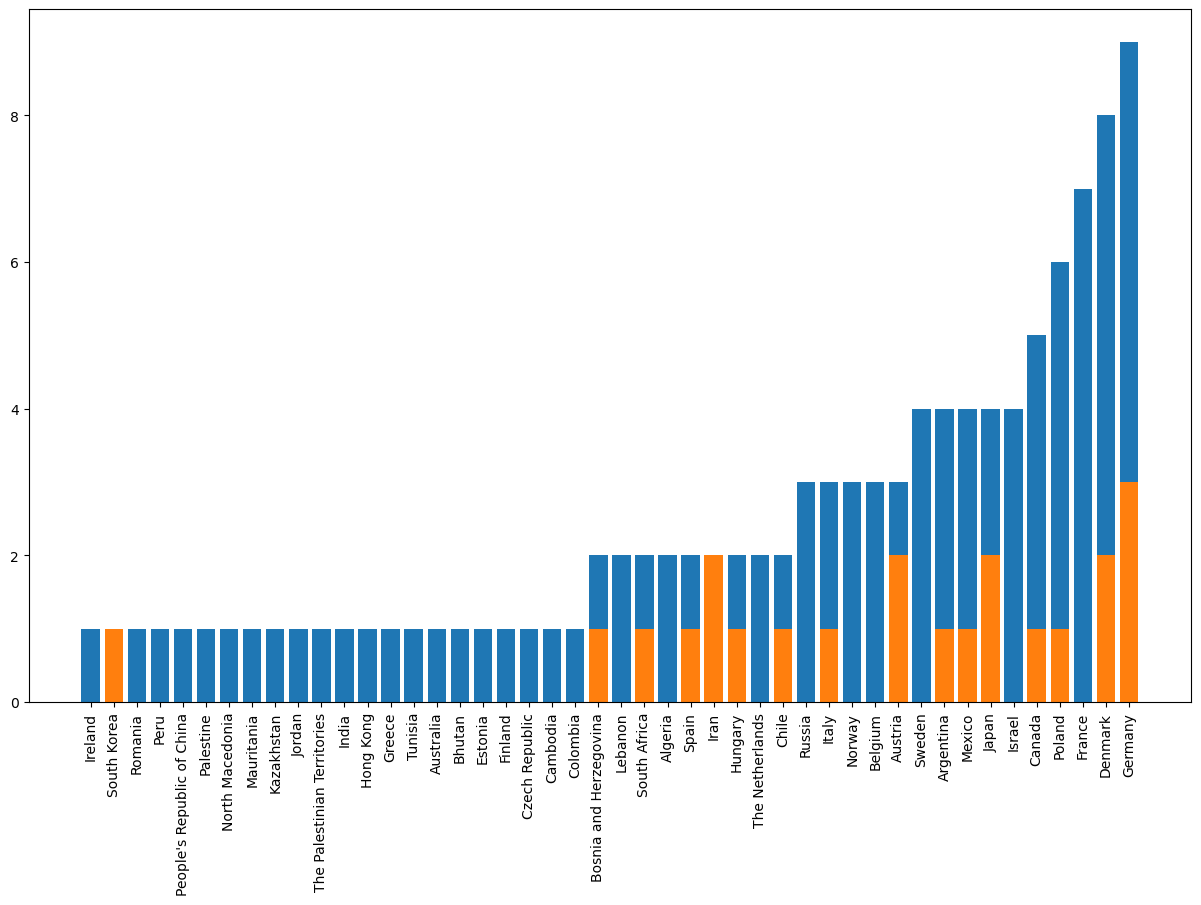

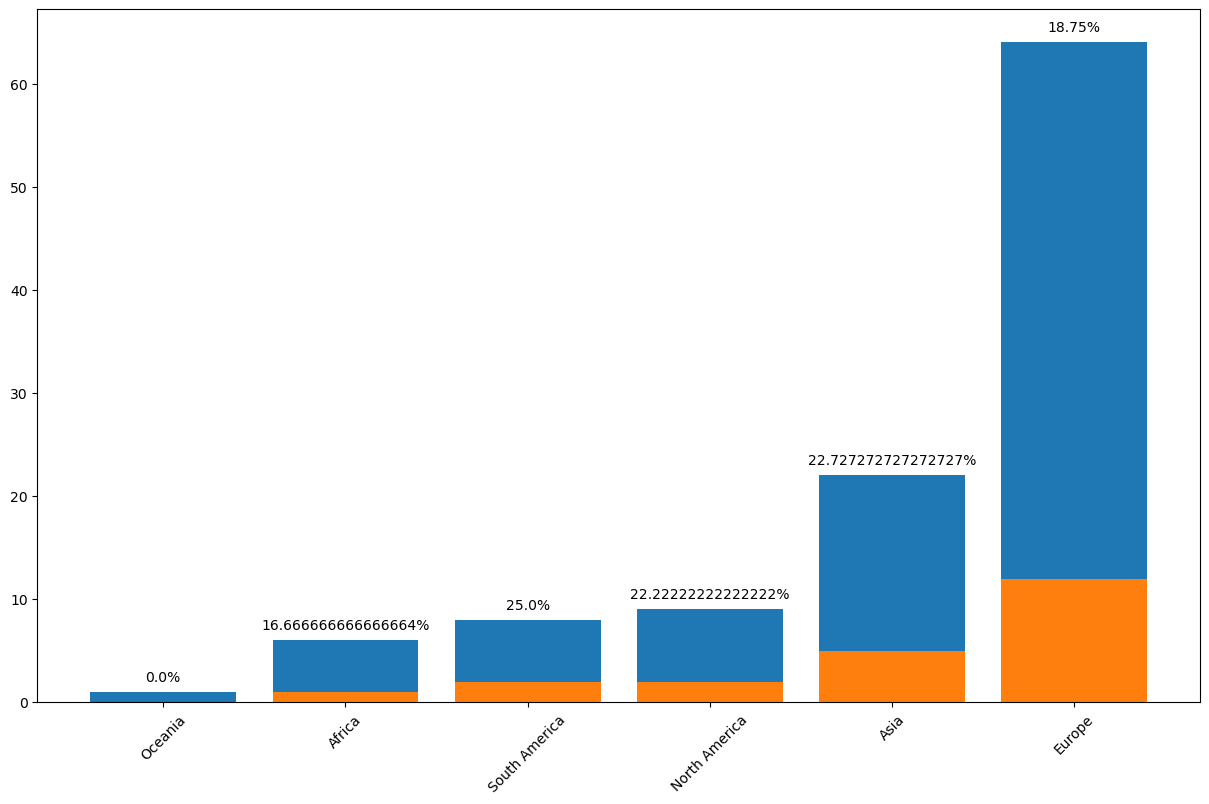

In [69]:
countries_df = pd.DataFrame(academy_awards_nominees.find({'category': 'International Feature Film',
                                                          'year_ceremony': {'$gte': 2002}}))[['film', 'country', 
                                                                                              'continent', 'winner']]
fig, ax1 = plt.subplots(figsize=(15, 9))
countries_aux_df = countries_df.groupby(['country']).size().to_frame('num').reset_index().sort_values(by='num')
countries_aux_df2 = countries_df[countries_df['winner'] == True].groupby(['country']).size().to_frame('num').reset_index().sort_values(by='num')
ax1.bar(countries_aux_df['country'], countries_aux_df['num'])
ax1.bar(countries_aux_df2['country'], countries_aux_df2['num'])
for item in ax1.get_xticklabels():
    item.set_rotation(90)


fig, ax2 = plt.subplots(figsize=(15, 9))
countries_aux_df = countries_df.groupby(['continent']).size().to_frame('num').sort_values(by='num').reset_index()
countries_aux_df2 = countries_df[countries_df['winner'] == True].groupby(['continent']).size().to_frame('num').reset_index().sort_values(by='num')
for el in countries_aux_df['continent']:
    if el not in countries_aux_df2['continent'].tolist():
        countries_aux_df2.loc[len(countries_aux_df2)] = [el, 0]
countries_aux_df2 = countries_aux_df2.sort_values(by='num').reset_index(drop=True)

ax2.bar(countries_aux_df['continent'], countries_aux_df['num'])
ax2.bar(countries_aux_df2['continent'], countries_aux_df2['num'])
for item in ax2.get_xticklabels():
    item.set_rotation(45)
    
for i, v in enumerate(countries_aux_df['num']):
    ax2.text(i, v + 0.75, 
             ''.join([str(countries_aux_df2['num'][i] / countries_aux_df['num'][i] * 100), '%']), ha='center', va='bottom')

# # # # # # # # # # # # # # # # # # # # # #

# PREDICTING  MODEL

# # # # # # # # # # # # # # # # # # # # # #

# Gender and Race mapping to numerical values for analysis

In [70]:
race_gender_map = {'gender': {'Female': 1, 'F - M': 2, 'Male': 3},
                   'race': {'Black': 1, 'White': 2, 'Indian': 3, 'Hispanic': 4, 'Middle Eastern': 5, 'Asian': 6, 
                            'B - W': 7, 'I - W': 8, 'H - W': 9, 'ME - W': 10, 'A - W': 11, 'ME - B': 12, 'A - I - W': 13}}
df = df.replace(race_gender_map)

# Predictions

In [71]:
nominations_2023 = pd.DataFrame(academy_awards_nominees.find({'year_ceremony': 2023}))

# set NaN nominations and wins to 0 to avoid errors
nominations_2023.loc[nominations_2023['nom_GG_same_cat'].isna(), 'nom_GG_same_cat'] = 0
nominations_2023.loc[nominations_2023['win_GG_same_cat'].isna(), 'win_GG_same_cat'] = 0
nominations_2023.loc[nominations_2023['nom_SAG_same_cat'].isna(), 'nom_SAG_same_cat'] = 0
nominations_2023.loc[nominations_2023['win_SAG_same_cat'].isna(), 'win_SAG_same_cat'] = 0
nominations_2023.loc[nominations_2023['nom_BAF_same_cat'].isna(), 'nom_BAF_same_cat'] = 0
nominations_2023.loc[nominations_2023['win_BAF_same_cat'].isna(), 'win_BAF_same_cat'] = 0
nominations_2023.loc[nominations_2023['nom_VES_same_cat'].isna(), 'nom_VES_same_cat'] = 0
nominations_2023.loc[nominations_2023['win_VES_same_cat'].isna(), 'win_VES_same_cat'] = 0
nominations_2023 = nominations_2023.replace(race_gender_map)
nominations_2023 = pd.concat([nominations_2023.drop(['film_awards'], axis=1), 
                              nominations_2023['film_awards'].apply(pd.Series)], axis=1)

df = pd.DataFrame(academy_awards_nominees.find({'year_ceremony': {'$gte': 2002, '$lte': 2022}}))

# set NaN nominations and wins to 0 to avoid errors
df.loc[df['nom_GG_same_cat'].isna(), 'nom_GG_same_cat'] = 0
df.loc[df['win_GG_same_cat'].isna(), 'win_GG_same_cat'] = 0
df.loc[df['nom_SAG_same_cat'].isna(), 'nom_SAG_same_cat'] = 0
df.loc[df['win_SAG_same_cat'].isna(), 'win_SAG_same_cat'] = 0
df.loc[df['nom_BAF_same_cat'].isna(), 'nom_BAF_same_cat'] = 0
df.loc[df['win_BAF_same_cat'].isna(), 'win_BAF_same_cat'] = 0
df.loc[df['nom_VES_same_cat'].isna(), 'nom_VES_same_cat'] = 0
df.loc[df['win_VES_same_cat'].isna(), 'win_VES_same_cat'] = 0
df = df.replace(race_gender_map)
df = pd.concat([df.drop(['film_awards'], axis=1), df['film_awards'].apply(pd.Series)], axis=1)


mod = GaussianNB()
correct_predictions = 0

for cat in nominations_2023['category'].unique():
    if cat == 'Visual Effects':
        X = df[df['category'] == cat][['nom_BAF_same_cat', 'win_BAF_same_cat', 
                                       'nom_VES_same_cat', 'win_VES_same_cat']]
        y = df[df['category'] == cat]['winner']

        model = mod
        model.fit(X, y)

        X_2023 = nominations_2023[nominations_2023['category'] == cat][['nom_BAF_same_cat', 'win_BAF_same_cat', 
                                                                        'nom_VES_same_cat', 'win_VES_same_cat']]

    elif cat in ['Directing']:
        X = df[df['category'] == cat][['nom_BAF_same_cat', 'win_BAF_same_cat', 'race', 'gender',
                                       'nom_GG_same_cat', 'win_GG_same_cat']]
        y = df[df['category'] == cat]['winner']

        model = mod
        model.fit(X, y)

        X_2023 = nominations_2023[nominations_2023['category'] == cat][['nom_BAF_same_cat', 'win_BAF_same_cat', 'race',
                                                                        'gender', 'nom_GG_same_cat', 'win_GG_same_cat']]

    elif cat in ['Best Picture']:
        X = df[df['category'] == cat][['nom_BAF_same_cat', 'win_BAF_same_cat', 'rating', 'nom_GG_same_cat', 
                                       'win_GG_same_cat', 'nomsOscars', 'nomsGoldenGlobes', 'nomsBaftas']]
        y = df[df['category'] == cat]['winner']

        model = mod
        model.fit(X, y)

        X_2023 = nominations_2023[nominations_2023['category'] == cat][['nom_BAF_same_cat', 'win_BAF_same_cat', 
                                                                        'rating', 'nom_GG_same_cat', 'win_GG_same_cat', 
                                                                        'nomsOscars', 'nomsGoldenGlobes', 'nomsBaftas']]


    elif cat in ['Actor in a Leading Role', 'Actor in a Supporting Role', 
                 'Actress in a Leading Role', 'Actress in a Supporting Role']:
        X = df[df['category'].isin(['Actor in a Leading Role', 
                                    'Actor in a Supporting Role', 
                                    'Actress in a Leading Role', 
                                    'Actress in a Supporting Role'])][['nomsBaftas', 'nomsGoldenGlobes', 'nomsOscars', 
                                                                       'winsBaftas', 'winsGoldenGlobes', 
                                                                       'nom_GG_same_cat', 'win_GG_same_cat', 
                                                                       'nom_SAG_same_cat', 'win_SAG_same_cat', 'race']]
        y = df[df['category'].isin(['Actor in a Leading Role', 
                                    'Actor in a Supporting Role', 
                                    'Actress in a Leading Role', 
                                    'Actress in a Supporting Role'])]['winner']

        model = mod
        model.fit(X, y)

        X_2023 = nominations_2023[nominations_2023['category'] == cat][['nomsBaftas', 'nomsGoldenGlobes', 'nomsOscars', 
                                                                        'winsBaftas', 'winsGoldenGlobes', 
                                                                        'nom_GG_same_cat', 'win_GG_same_cat', 
                                                                        'nom_SAG_same_cat', 'win_SAG_same_cat', 'race']]


    elif cat in ['Animated Feature Film',
                 'Makeup and Hairstyling',
                 'Costume Design',
                 'International Feature Film', 
                 'Music (Original Score)',
                 'Music (Original Song)',
                 'Writing (Original Screenplay)',
                 'Writing (Adapted Screenplay)']:

        X = df[df['category'].isin(['Animated Feature Film',
                                    'Makeup and Hairstyling',
                                    'Costume Design',
                                    'International Feature Film', 
                                    'Music (Original Score)',
                                    'Music (Original Song)',
                                    'Writing (Original Screenplay)',
                                    'Writing (Adapted Screenplay)'])][['nomsBaftas', 'nomsGoldenGlobes', 'nomsOscars', 
                                                                       'winsBaftas', 'winsGoldenGlobes', 
                                                                       'nom_GG_same_cat', 'win_GG_same_cat', 
                                                                       'nom_SAG_same_cat', 'win_SAG_same_cat', 'race',
                                                                       'gender']]
        y = df[df['category'].isin(['Animated Feature Film',
                                    'Makeup and Hairstyling',
                                    'Costume Design',
                                    'International Feature Film', 
                                    'Music (Original Score)',
                                    'Music (Original Song)',
                                    'Writing (Original Screenplay)',
                                    'Writing (Adapted Screenplay)'])]['winner']

        model = mod
        model.fit(X, y)

        X_2023 = nominations_2023[nominations_2023['category'] == cat][['nomsBaftas', 'nomsGoldenGlobes', 'nomsOscars', 
                                                                        'winsBaftas', 'winsGoldenGlobes', 
                                                                        'nom_GG_same_cat', 'win_GG_same_cat', 
                                                                        'nom_SAG_same_cat', 'win_SAG_same_cat', 'race',
                                                                        'gender']]

    elif cat in ['Film Editing']:
        X = df[df['category'] == cat][['nom_BAF_same_cat', 'win_BAF_same_cat', 'nomsOscars', 
                                       'nomsGoldenGlobes', 'nomsBaftas', 'winsGoldenGlobes', 'winsBaftas']]
        y = df[df['category'] == cat]['winner']

        model = mod
        model.fit(X, y)

        X_2023 = nominations_2023[nominations_2023['category'] == cat][['nom_BAF_same_cat', 'win_BAF_same_cat',
                                                                        'nomsOscars', 'nomsGoldenGlobes', 'nomsBaftas',
                                                                        'winsGoldenGlobes', 'winsBaftas']]

    else:
        X = df[~df['category'].isin(['Visual Effects',
                                     'Directing',
                                     'Best Picture',
                                     'Actor in a Leading Role', 
                                     'Actor in a Supporting Role', 
                                     'Actress in a Leading Role', 
                                     'Actress in a Supporting Role',
                                     'Animated Feature Film',
                                     'Makeup and Hairstyling',
                                     'Costume Design',
                                     'International Feature Film', 
                                     'Music (Original Score)',
                                     'Music (Original Song)',
                                     'Writing (Original Screenplay)',
                                     'Writing (Adapted Screenplay)',
                                     'Film Editing'])][['nomsBaftas', 'nomsGoldenGlobes', 'nomsOscars', 
                                                        'winsBaftas', 'winsGoldenGlobes']]
        y = df[~df['category'].isin(['Visual Effects',
                                     'Directing',
                                     'Best Picture',
                                     'Actor in a Leading Role', 
                                     'Actor in a Supporting Role', 
                                     'Actress in a Leading Role', 
                                     'Actress in a Supporting Role',
                                     'Animated Feature Film',
                                     'Makeup and Hairstyling',
                                     'Costume Design',
                                     'International Feature Film', 
                                     'Music (Original Score)',
                                     'Music (Original Song)',
                                     'Writing (Original Screenplay)',
                                     'Writing (Adapted Screenplay)',
                                     'Film Editing'])]['winner']

        model = mod
        model.fit(X, y)

        X_2023 = nominations_2023[nominations_2023['category'] == cat][['nomsBaftas', 'nomsGoldenGlobes', 'nomsOscars', 
                                                                        'winsBaftas', 'winsGoldenGlobes']]

    y_pred = mod.predict_proba(X_2023)
    nominations_2023.loc[nominations_2023['category'] == cat, 'pred'] = y_pred[:, 1]

    sorted_pred = nominations_2023[nominations_2023['category'] == cat].sort_values(by='pred', ascending=False)


    print(cat)
    print("   ", sorted_pred.iloc[0]['film'])
    print("   ", sorted_pred.iloc[0]['winner'])
    print("       ", sorted_pred.loc[sorted_pred['winner'] == 1]['film'].tolist()[0], 
                     sorted_pred.loc[sorted_pred['winner'] == 1]['pred'].tolist()[0])
    if sorted_pred.iloc[0]['winner'] == 1:
        correct_predictions += 1
    else:
        print("        Position:", 
              sorted_pred['film'].tolist().index(sorted_pred.loc[sorted_pred['winner'] == 1]['film'].tolist()[0]) + 1)

print(correct_predictions, "|", len(nominations_2023['category'].unique()))

Actor in a Leading Role
    The Whale
    True
        The Whale 0.9910967054256101
Actor in a Supporting Role
    Everything Everywhere All at Once
    True
        Everything Everywhere All at Once 0.999996600245036
Actress in a Leading Role
    Everything Everywhere All at Once
    True
        Everything Everywhere All at Once 0.999996600245036
Actress in a Supporting Role
    Everything Everywhere All at Once
    True
        Everything Everywhere All at Once 0.9995872930673726
Animated Feature Film
    Guillermo del Toro's Pinocchio
    True
        Guillermo del Toro's Pinocchio 0.9999965156677981
Cinematography
    All Quiet on the Western Front
    True
        All Quiet on the Western Front 0.9998460161482006
Costume Design
    Everything Everywhere All at Once
    False
        Black Panther: Wakanda Forever 0.010891848843604621
        Position: 4
Directing
    Everything Everywhere All at Once
    True
        Everything Everywhere All at Once 1.0
Documentary Feature Film
